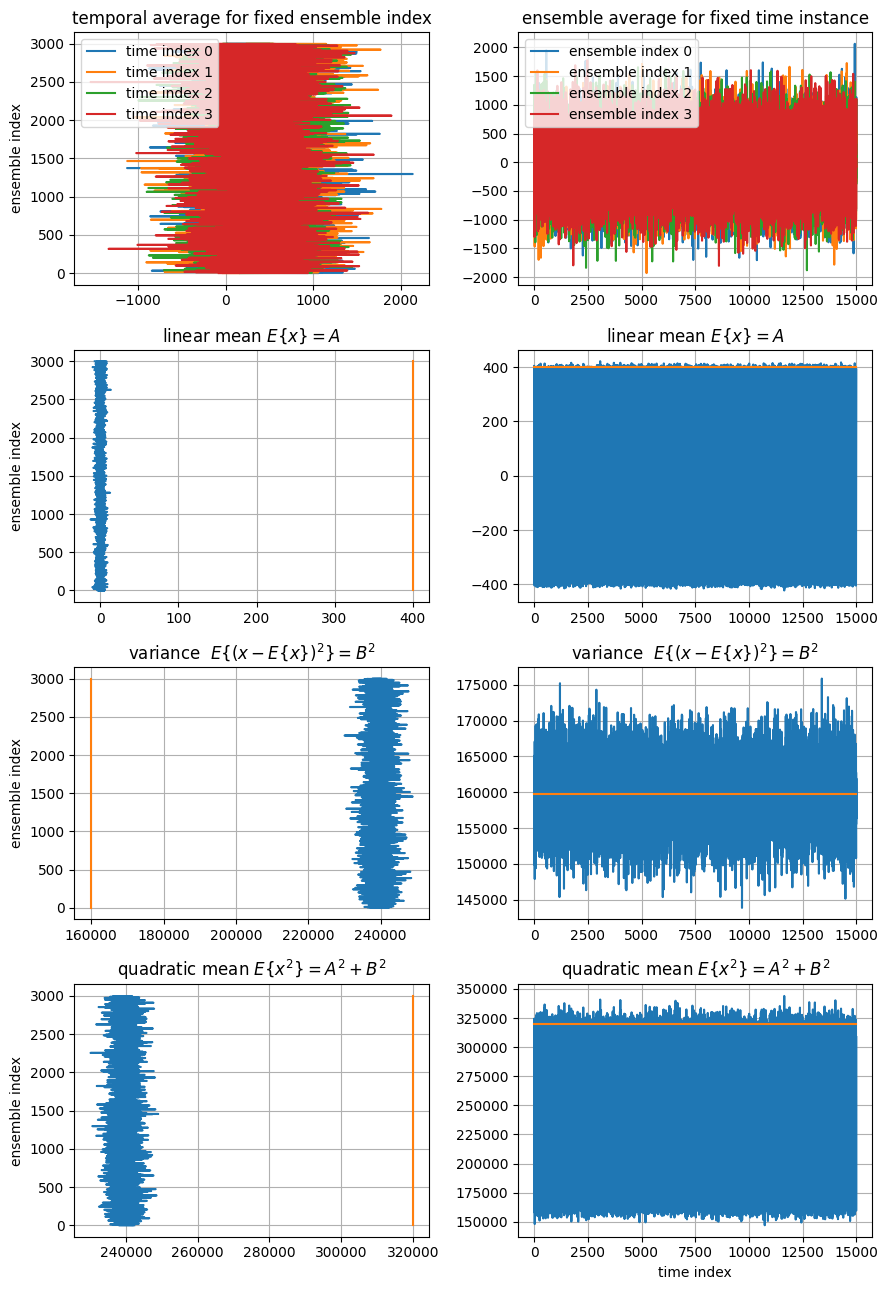

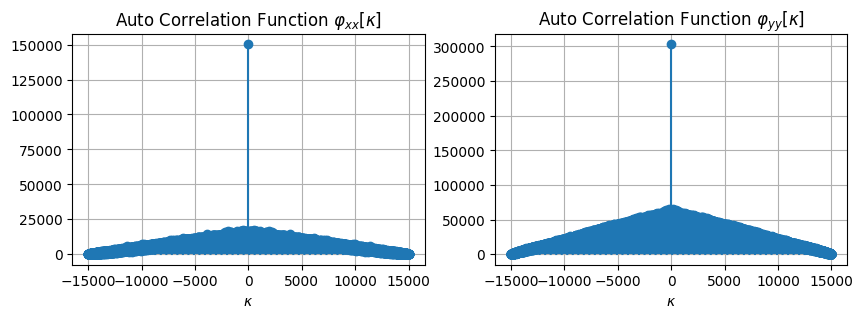

In [13]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats

Ns = 3000  # number of samples to set up an ensemble
Nt = 15000  # number of time steps to set up 'ensemble over time'-characteristics
np.random.seed(1)

s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

f = 400
A = 400.25
B = 399.75

# Generate the noise
W_n = np.random.normal(loc=0, scale=1, size=[Ns, Nt])

# Generate the signal
x = A * np.cos(2 * np.pi * f * np.arange(Nt) / Nt) + B * W_n

fig, axs = plt.subplots(4, 2, figsize=(9, 13))
# plot signals
for i in range(4):
    axs[0, 0].plot(x[:, i], s, label='time index '+str(i))
    axs[0, 1].plot(t, x[i, :], label='ensemble index '+str(i))
# plot means
axs[1, 0].plot(np.mean(x, axis=1), s)
axs[1, 1].plot(t, np.mean(x, axis=0))
axs[1, 0].plot([A, A], [0, Ns])
axs[1, 1].plot([0, Nt], [A, A])
# plot variance
axs[2, 0].plot(np.var(x, axis=1), s)
axs[2, 1].plot(t, np.var(x, axis=0))
axs[2, 0].plot([B**2, B**2], [0, Ns])
axs[2, 1].plot([0, Nt], [B**2, B**2])
# plot quadratic mean
axs[3, 0].plot(np.mean(x**2, axis=1), s)
axs[3, 1].plot(t, np.mean(x**2, axis=0))
axs[3, 0].plot([A**2 + B**2, A**2 + B**2], [0, Ns])
axs[3, 1].plot([0, Nt], [A**2 + B**2, A**2 + B**2])
# labeling
axs[3, 1].set_xlabel('time index')
for i in range(4):
    axs[i, 0].set_ylabel('ensemble index')
    for j in range(2):
        axs[i, j].grid(True)
axs[0, 0].set_title(r'temporal average for fixed ensemble index')
axs[0, 1].set_title(r'ensemble average for fixed time instance')
for i in range(2):
    axs[0, i].legend(loc='upper left')
    axs[1, i].set_title(r'linear mean $E\{x\} = A$')
    axs[2, i].set_title(r'variance  $E\{(x -E\{x\} )^2\} = B^2$')
    axs[3, i].set_title(r'quadratic mean $E\{x^2\} = A^2+B^2$')
plt.tight_layout()
plt.show()



locx, scalex = 1, 3
x = np.random.normal(loc=locx, scale=scalex, size=[Ns, Nt])


locy, scaley = 2, 4
y = np.random.normal(loc=locy, scale=scaley, size=[Ns, Nt])

def my_xcorr(x, y):
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{yy}[\kappa]$')
plt.grid(True)